Word Vector Visualization

In [30]:
import numpy as np
import sys
import math

In [31]:
filePath = "glove.6B.50d.txt"
# 50차원

In [32]:
with open(filePath, 'r', encoding='utf8') as f:
	print(f.readline()[:-1].split().__len__() - 1)
# 50차원 체크함

50


In [33]:
wordData = {}

with open(filePath, 'r', encoding='utf8') as f:
	a = f.readline()[:-1].split()
	# a[0] : name
	# a[1:] : vectors
	wordData[a[0]] = np.array(a[1:], dtype=np.float16) * (1 / 6)
wordData

{'the': array([ 6.9641e-02,  4.1595e-02, -6.8726e-02,  2.0279e-02,  5.7526e-02,
        -7.4081e-03, -8.2764e-02, -2.9755e-02, -1.1003e-04, -1.0944e-01,
         4.6387e-02, -2.4612e-02, -9.2773e-02,  2.4429e-02, -1.5841e-03,
         1.9426e-03,  1.6998e-02, -2.1317e-02, -1.4062e-01, -2.0294e-02,
        -2.8000e-03, -5.5450e-02, -2.5848e-02, -3.8544e-02, -3.1952e-02,
        -3.1348e-01, -1.2793e-01,  1.6510e-02, -7.0190e-02, -3.2532e-02,
         6.6797e-01, -3.0975e-02, -8.7158e-02, -5.2795e-02,  9.8705e-05,
         1.2407e-03,  2.9617e-02, -2.6489e-02,  2.0065e-03, -9.0332e-03,
        -4.9805e-02, -2.6245e-02, -5.7922e-02, -7.6027e-03, -7.3730e-02,
         3.1311e-02,  4.6396e-04, -3.0670e-02, -1.9180e-02, -1.3086e-01],
       dtype=float16)}

In [34]:
wordData = {}

with open(filePath, 'r', encoding='utf8') as f:
	for line in f.readlines():
		a = line.split()
		# a[0] : name
		# a[1:] : vectors
		wordData[a[0]] = np.array(a[1:], dtype=np.float16) * (1 / 6)

10초 정도 소요

In [35]:
print(f"{len(wordData.keys())} keys")

400000 keys


In [36]:
def gdbd(firstData, secondData):
	"""
	getDifferenceByDistance
	"""
	sumVar = 0
	for a, b in zip(firstData, secondData):
		sumVar += (a - b) ** 2
	return math.sqrt(sumVar)

In [37]:
gdbd(wordData['queen'], wordData['king']), gdbd(wordData['woman'], wordData['man'])

(0.579416461850131, 0.4336512287619555)

In [38]:
gdbd(wordData['mother'], wordData['father']), gdbd(wordData['woman'], wordData['man'])

(0.4294590064782471, 0.4336512287619555)

Let's plot

In [39]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

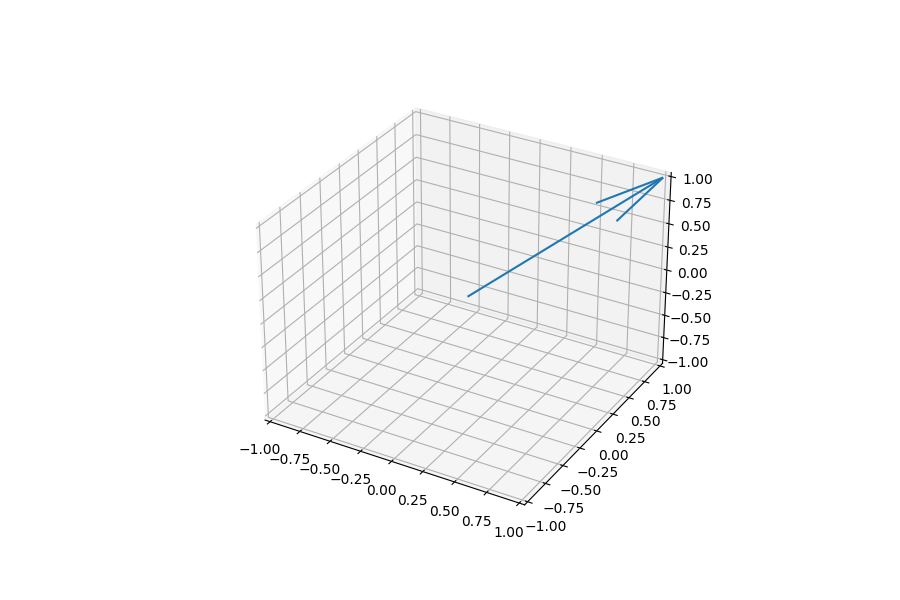

In [40]:
fig = plt.figure(figsize=(9, 6))
ax = fig.add_subplot(111, projection='3d')

ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_zlim([-1, 1])

ax.quiver([0], [0], [0], [1], [1], [1])

plt.show()


In [41]:
%matplotlib widget

In [42]:
def showVector(nameList : list, vectorList : list) -> None:
	# colors = mcolors.CSS4_COLORS.keys()
	colors = list(mcolors.TABLEAU_COLORS.keys())
	fig = plt.figure()
	ax = fig.add_subplot(111, projection='3d')

	ax.set_xlabel('x')
	ax.set_ylabel('y')
	ax.set_zlabel('z')

	ax.set_xlim([-1, 1])
	ax.set_ylim([-1, 1])
	ax.set_zlim([-1, 1])

	X = [0]
	Y = [0]
	Z = [0]

	for i in range(len(vectorList)):
		ax.text(vectorList[i][0], vectorList[i][1], vectorList[i][2], nameList[i], size=12, color=colors[i])
		ax.quiver(X, Y, Z, vectorList[i][0], vectorList[i][1], vectorList[i][2], color=colors[i])

	plt.show()

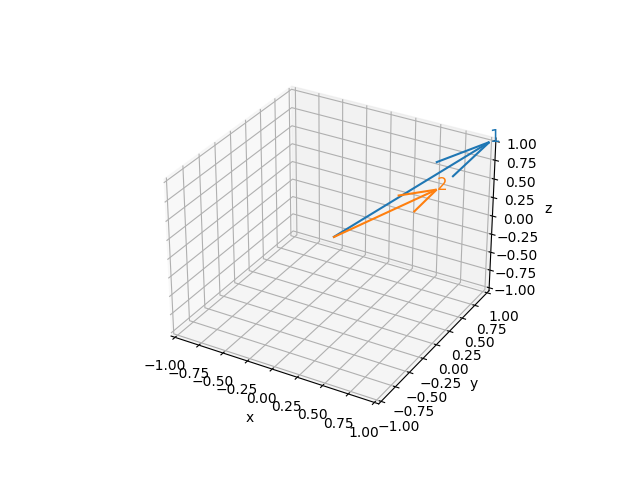

In [43]:
showVector(
	[
		"1",
		"2"
	],
	[
		(1, 1, 1),
		(1, 0, 1)
	]
)

In [44]:
gdbd(wordData['mother'], wordData['father']), gdbd(wordData['woman'], wordData['man'])

(0.4294590064782471, 0.4336512287619555)

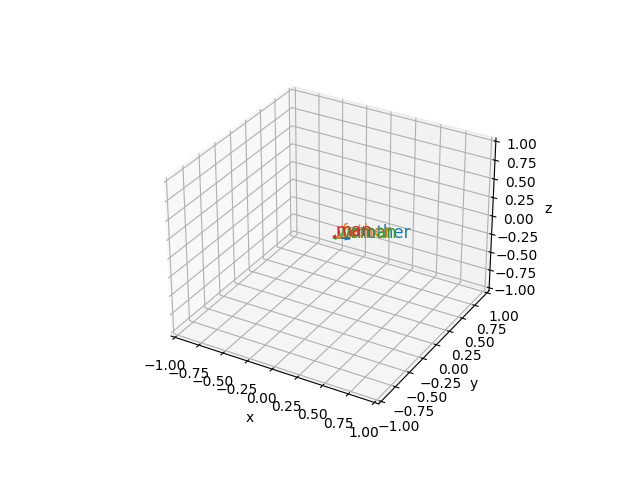

In [45]:
showVector(
	[
		"mother",
		"father",
		"woman",
		"man",
	],
	[
		wordData['mother'][:3],
		wordData['father'][:3],
		wordData['woman'][:3],
		wordData['man'][:3],
	]
)

In [46]:
def cd(a : list, b : list) -> float:
	"""
	cosineDistance
	"""
	sumA = 0
	for x in a:
		sumA += x*x
	sumB = 0
	for x in b:
		sumB += x*x
	sumAMB = 0
	for x, y in zip(a, b):
		sumAMB += x*y
	return sumAMB / math.sqrt(sumA + sumB)

In [47]:
gdbd(wordData['mother'], wordData['father']), gdbd(wordData['woman'], wordData['man'])

(0.4294590064782471, 0.4336512287619555)

In [48]:
cd(wordData['mother'], wordData['father']), cd(wordData['woman'], wordData['man'])

(0.5738313649147516, 0.5640167072252946)